## Recurrent Neural Network

<p align='center'>
    <img src="https://www.bouvet.no/bouvet-deler/explaining-recurrent-neural-networks/_/attachment/inline/dbb03f2e-cfa5-4914-88fd-422231379121:b9e76ed5b43ad981d8e9891158a192ec098c2314/Screenshot%202019-07-11%20at%2016.31.24.png"></img>
</p>

A simple recurrent neural network (RNN) is a type of neural network architecture designed to process sequential data by maintaining an internal state or memory. It is a form of recurrent neural network where the output at each time step is fed back as input to the network at the next time step.

In a simple RNN, the hidden state at each time step is computed based on the current input and the previous hidden state. This hidden state serves as the memory that retains information from previous time steps and influences the current prediction. The output at each time step is typically derived from the hidden state.

Mathematically, the hidden state at time step t in a simple RNN can be represented as:

$$h(t) = f(W * x(t) + U * h(t-1) + b)$$

where:
- $h(t)$ is the hidden state at time step t.
- $x(t)$ is the input at time step t.
- $W$, $U$, and $b$ are learnable parameters (weight matrices and bias vector).
- f is an activation function, often a non-linear function like the hyperbolic tangent (tanh) or sigmoid function.

The output at each time step can be computed based on the hidden state or can be passed through additional layers for further processing.

Simple RNNs are useful for modeling sequential data where the current state depends on the previous states and have been employed in various applications such as natural language processing, speech recognition, and time series analysis. However, they suffer from the vanishing gradient problem, limiting their ability to capture long-term dependencies. This limitation led to the development of more advanced RNN variants like the long short-term memory (LSTM) and gated recurrent unit (GRU), which alleviate the vanishing gradient problem and enable better modeling of long sequences.

An example of how you can use NumPy to create a sine function, add noise, and then use TensorFlow to build a simple RNN model to fit the data.

```python
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Generate input data
np.random.seed(42)
t = np.linspace(0, 10, 1000)  # Time steps
X = np.sin(t)  # Sine function

# Add noise to X
noise = np.random.normal(0, 0.1, size=X.shape)
Y = 2 * X + noise

# Reshape the data for input to the RNN
X = X.reshape(-1, 1, 1)  # (samples, timesteps, features)
Y = Y.reshape(-1, 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(10, input_shape=(1, 1)))  # 10 units in the RNN layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model on X and Y
model.fit(X, Y, epochs=10, batch_size=32)
```

In this example, we first create the sine function `X` using NumPy's `sin` function. We then add some Gaussian noise to it to generate the target `Y`. The data is reshaped to the required format for the input to the RNN layer.

We then build a sequential model in TensorFlow and add a `SimpleRNN` layer with 10 units, followed by a dense layer with a single output. The model is compiled with the mean squared error loss and the Adam optimizer.

Finally, we fit the model on the input `X` and target `Y` using a batch size of 32 and train it for 10 epochs. Feel free to adjust the hyperparameters and network architecture according to your requirements.

## Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

## Generate Toy Data

We generate toy data for simple demonstration.

In [2]:
# Generate input data
np.random.seed(42)
t = np.linspace(0, 10, 1000)  # Time steps
X = np.sin(t)  # Sine function

In [3]:
import matplotlib.pyplot as plt

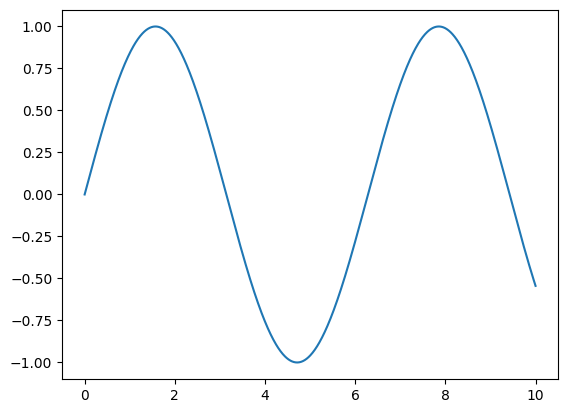

In [4]:
plt.plot(t, X.reshape(1000, 1))
plt.show()

In [5]:
# Add noise to X
noise = np.random.normal(0, 0.1, size=X.shape)
Y = 2 * X + noise

### Visualization: Feature and Ground Truth

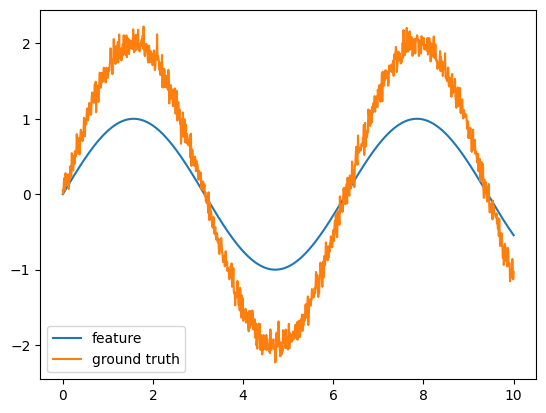

In [6]:
plt.plot(t, X.reshape(1000, 1))
plt.plot(t, Y.reshape(1000, 1))
plt.legend(['feature', 'ground truth'])
plt.show()

### Reshape Data for RNN Model

In [7]:
# Reshape the data for input to the RNN
X = X.reshape(-1, 1, 1)  # (samples, timesteps, features)
Y = Y.reshape(-1, 1)

In [8]:
benchmark_model = Sequential()
benchmark_model.add(tf.keras.layers.Flatten())
benchmark_model.add(Dense(1))

benchmark_model.compile(loss='mean_squared_error', optimizer='adam')
benchmark_model.fit(X, Y, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 2s 4ms/step - loss: 0.7655
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7180
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6741
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6345
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5979
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.5643
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5326
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 0.5041
Epoch 9/10
32/32 [==============================] - 0s 5ms/step - loss: 0.4770
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4517


In [9]:
y_pred_before = benchmark_model.predict(X)

32/32 [==============================] - 0s 3ms/step


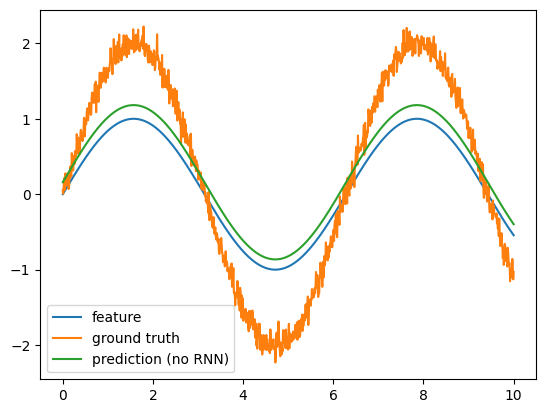

In [10]:
plt.plot(t, X.reshape(1000, 1))
plt.plot(t, Y.reshape(1000, 1))
plt.plot(t, y_pred_before)
plt.legend(['feature', 'ground truth', 'prediction (no RNN)'])
plt.show()

## Model Construction and Training

In [11]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(10, input_shape=(1, 1)))  # 10 units in the RNN layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model on X and Y
model.fit(X, Y, epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 3s 4ms/step - loss: 1.1159
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.8126
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.5935
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 0.4294
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 0.3016
Epoch 6/10
32/32 [==============================] - 0s 4ms/step - loss: 0.2040
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.1336
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0846
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0345


## Inference

In [12]:
y_pred = model.predict(X)

32/32 [==============================] - 0s 3ms/step


### Visualization: Feature, Ground Truth, and Prediction

This is in-sample, but it's a good visualization of the power of a Recurrent Neural Network model. The purpose is to convery the sequential pattern to data scientists and this type of model can do the job better.

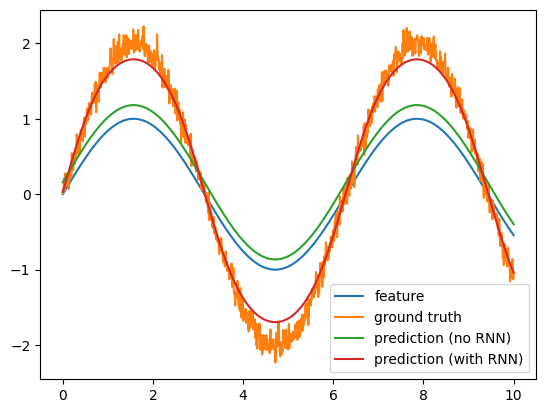

In [13]:
plt.plot(t, X.reshape(1000, 1))
plt.plot(t, Y.reshape(1000, 1))
plt.plot(t, y_pred_before)
plt.plot(t, y_pred.reshape(1000, 1))
plt.legend(['feature', 'ground truth','prediction (no RNN)', 'prediction (with RNN)'])
plt.show()